The term 'fake news' has skyrocketed in popularity in recent years. Yellow journalism has undoubtedly become an increasingly challenging problem over the years. Now easily-accessible AI programs can even be used to create artificial audio and video clips. This project will attempt to 'fight fire with fire', using machine learning to correctly identify real vs fake news.

We will be using sklearn's TfidfdVectorizer and PassiveAggressiveClassifier functions for classification.
Inspiration and dataset are taken from data-flair.com

In [63]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [6]:
# Read and preview our data
df = pd.read_csv('news.csv')

print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
# Create a series object containing solely our labels
labels = df['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [20]:
# Split up into testing and training sets
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=.2, random_state=42)
print(x_train.head())
print(y_train.head())

1142    Donald Trump received a key endorsement for hi...
2654    Nina November 6, 2016 @ 2:39 pm \nPolish gover...
5395    Time: Investigating Hillary is an Attack on Al...
1170    Taki's Magazine October 28, 2016 \nThis electi...
4371    Pakistan Pakistan's cricketer turned politicia...
Name: text, dtype: object
1142    REAL
2654    FAKE
5395    FAKE
1170    FAKE
4371    FAKE
Name: label, dtype: object


In [32]:
# We will use sklearn's TfidVectorizer to split our documents (articles' text) into a...
#...TF-IDF matrix ranking phrase-importance
vectorizer = TfidfVectorizer(stop_words=None, max_df=.7)

# Fit our training data and transform it into a tfidf matrix
tfidf_train = vectorizer.fit_transform(x_train)

# Transform our test articles into proper format
tfidf_test = vectorizer.transform(x_test)
print(tfidf_train.shape)
print(tfidf_test.shape)

(5068, 61643)
(1267, 61643)


In [59]:
# We will use PAC for classification of articles. On paper, PAC will have efficient memory use...
#...and would not require re-training if our dataset were expanded (as opposed to an algorithm like SVM), although these advantages are somewhat irrelevant in this specific case
pac = PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy %: ', round(score*100, 2))

Accuracy %:  94.24


[[591  37]
 [ 36 603]]


<Axes: >

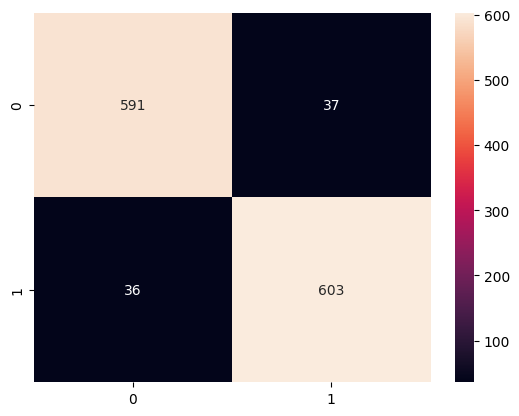

In [69]:
# Create a confusion matrix to visualize our results
conf_mat = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print(conf_mat)
sns.heatmap(conf_mat, annot=True, fmt='1')

**We see we predicted 591 correct positives, 603 correct negatives, 36 false positives, and 37 false negatives**